In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data=pd.read_csv('Wine.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

###### from sklearn.decomposition import PCA
    pca=PCA(n_components=None) 
  
     x_train=pca.fit_transform(x_train)
     x_test=pca.transform(x_test)
      explained_variance =pca.explained_variance_ratio_
      explained_variance
 
 
array([0.36884109, 0.19318394, 0.10752862, 0.07421996, 0.06245904,
       0.04909   , 0.04117287, 0.02495984, 0.02308855, 0.01864124,
       0.01731766, 0.01252785, 0.00696933]) 
       from this we can see only 2 components is necessary as it explains 56 percent variance

In [6]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)
explained_variance =pca.explained_variance_ratio_
explained_variance

array([0.36884109, 0.19318394])

In [7]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(random_state=0)
logistic.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [12]:
y_pred=logistic.predict(x_test)
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)
ac

0.9722222222222222

In [13]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]], dtype=int64)

### Visualising the training set 


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'PC 2')

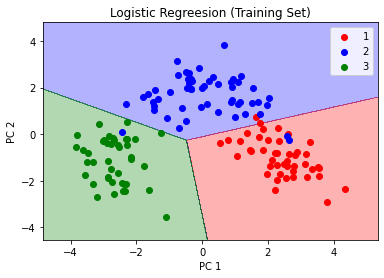

In [25]:
from matplotlib.colors import ListedColormap
x_temp,y_temp=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_train[:,0].min()-1,stop=x_train[:,0].max()+1,step=0.01),
                 np.arange(start=x_train[:,1].min()-1,stop=x_train[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,logistic.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            cmap=ListedColormap(('red','blue','green')),alpha=0.3)
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_temp)):
    plt.scatter(x_temp[y_temp==j,0],x_temp[y_temp==j,1],
               c=ListedColormap(('red','blue','green'))(i),label=j)
plt.legend()
plt.title('Logistic Regreesion (Training Set)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

### Visualising the testing set

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'PC 2')

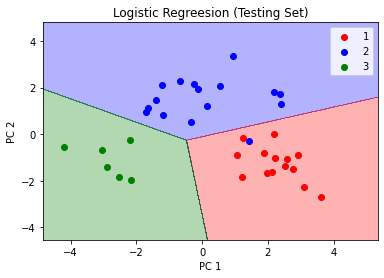

In [26]:
from matplotlib.colors import ListedColormap
x_temp,y_temp=x_test,y_test
x1,x2=np.meshgrid(np.arange(start=x_train[:,0].min()-1,stop=x_train[:,0].max()+1,step=0.01),
                 np.arange(start=x_train[:,1].min()-1,stop=x_train[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,logistic.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            cmap=ListedColormap(('red','blue','green')),alpha=0.3)
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_temp)):
    plt.scatter(x_temp[y_temp==j,0],x_temp[y_temp==j,1],
               c=ListedColormap(('red','blue','green'))(i),label=j)
plt.legend()
plt.title('Logistic Regreesion (Testing Set)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

#### I have applied logistic regression alogorithm ,,you can apply an
# Thank You !!!